# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , accuracy_score, recall_score, f1_score

import os


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Reading Train Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/CodSoft 2024/Movie  Generation Classification/Genre Classification Dataset/train_data.txt", sep=":::", names=["Title", "Genre", "Description"], engine="python")

In [4]:
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [5]:
train_data.shape

(54214, 3)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


# Reading Test Data

In [7]:
test_data = pd.read_csv("/content/drive/MyDrive/CodSoft 2024/Movie  Generation Classification/Genre Classification Dataset/test_data.txt", sep=":::", names=["Id" ,"Title", "Description"], engine="python")

In [8]:
test_data

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [9]:
test_data.shape

(54200, 3)

In [10]:
# Unique items of diffrent columns for train-data
for i in train_data.columns:
  print(i)
  print(train_data[i].unique())
  print(100*"-")

Title
[' Oscar et la dame rose (2009) ' ' Cupid (1997) '
 ' Young, Wild and Wonderful (1980) ' ...
 ' Ronald Goedemondt: Ze bestaan echt (2008) '
 ' Make Your Own Bed (1944) '
 " Nature's Fury: Storm of the Century (2006) "]
----------------------------------------------------------------------------------------------------
Genre
[' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' ' adventure ' ' talk-show ' ' western '
 ' family ' ' mystery ' ' history ' ' news ' ' biography ' ' romance '
 ' game-show ' ' musical ' ' war ']
----------------------------------------------------------------------------------------------------
Description
[' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Ros

In [11]:
# Unique items of diffrent columns for test_data
for i in test_data.columns:
  print(i)
  print(test_data[i].unique())
  print(100*"-")

Id
[    1     2     3 ... 54198 54199 54200]
----------------------------------------------------------------------------------------------------
Title
[" Edgar's Lunch (1998) " ' La guerra de papá (1977) '
 ' Off the Beaten Track (2010) ' ... ' Oliver Twink (2007) '
 ' Slipstream (1973) ' ' Curitiba Zero Grau (2010) ']
----------------------------------------------------------------------------------------------------
Description
[" L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa."
 ' Spain, March 1964: Quico is a very naughty child

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [13]:
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [14]:
test_data.columns

Index(['Id', 'Title', 'Description'], dtype='object')

# Visualisation of the data

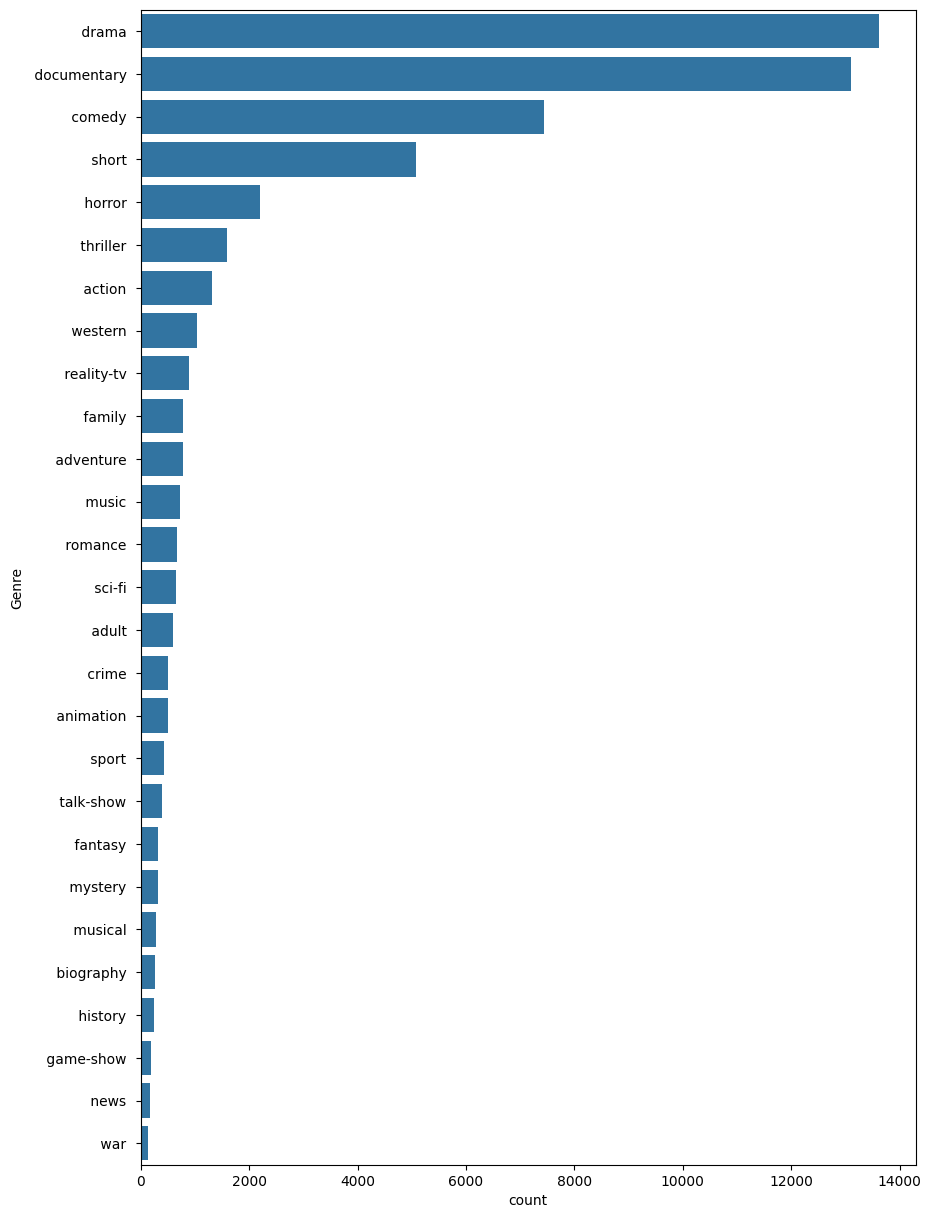

In [15]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="Genre", order= train_data["Genre"].value_counts().index)
plt.show()

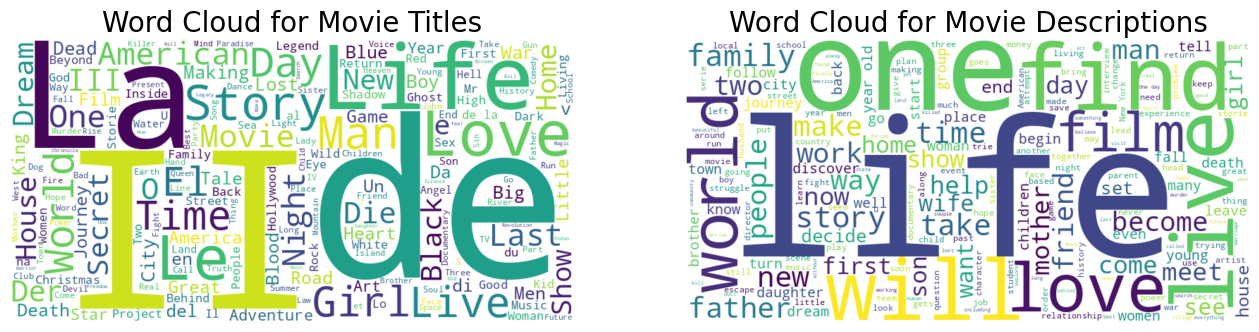

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for titles
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_data['Title']))
# Generate word cloud for descriptions
description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_data['Description']))

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Movie Titles', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Movie Descriptions', fontsize=20)
plt.axis('off')

plt.show()


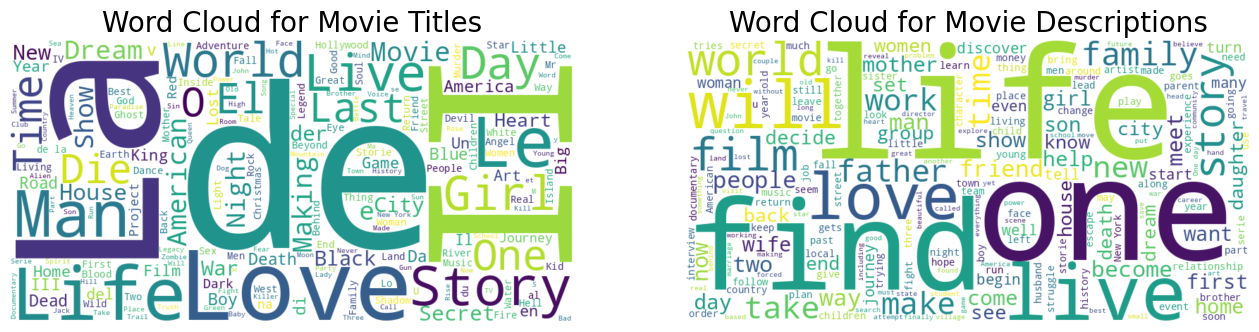

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for titles
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(test_data['Title']))
# Generate word cloud for descriptions
description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(test_data['Description']))

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Movie Titles', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Movie Descriptions', fontsize=20)
plt.axis('off')

plt.show()


In [18]:
from collections import Counter
import plotly.express as px

# Function to get word frequencies
def get_word_frequencies(text_series):
    all_words = ' '.join(text_series).lower().split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(10)  # Get 10 most common words
    return pd.DataFrame(common_words, columns=['word', 'count'])

# Word frequencies for titles
title_word_freq = get_word_frequencies(train_data['Title'])
# Word frequencies for descriptions
description_word_freq = get_word_frequencies(train_data['Description'])

# Bar chart for title word frequencies
fig_title = px.bar(title_word_freq, x='word', y='count', title='Most Common Words in Movie Titles')
fig_title.show()

# Bar chart for description word frequencies
fig_description = px.bar(description_word_freq, x='word', y='count', title='Most Common Words in Movie Descriptions')
fig_description.show()


In [19]:
from collections import Counter
import plotly.express as px

# Function to get word frequencies
def get_word_frequencies(text_series):
    all_words = ' '.join(text_series).lower().split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(10)  # Get 10 most common words
    return pd.DataFrame(common_words, columns=['word', 'count'])

# Word frequencies for titles
title_word_freq = get_word_frequencies(test_data['Title'])
# Word frequencies for descriptions
description_word_freq = get_word_frequencies(test_data['Description'])

# Bar chart for title word frequencies
fig_title = px.bar(title_word_freq, x='word', y='count', title='Most Common Words in Movie Titles')
fig_title.show()

# Bar chart for description word frequencies
fig_description = px.bar(description_word_freq, x='word', y='count', title='Most Common Words in Movie Descriptions')
fig_description.show()


In [20]:
for i in range(5):
    print("Genre: ", [i])
    print(train_data['Description'].iloc[i], "\n")
    print("Title: ", train_data['Title'].iloc[i], "\n\n")

Genre:  [0]
 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue. 

Title:   Oscar et la dame rose (2009)  


Genre:  [1]
 A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him. 

Title:   Cupid (1997)  


Genre:  [2]
 As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more 

In [21]:
train_data['Genre']

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
54210          comedy 
54211          horror 
54212     documentary 
54213          comedy 
54214         history 
Name: Genre, Length: 54214, dtype: object

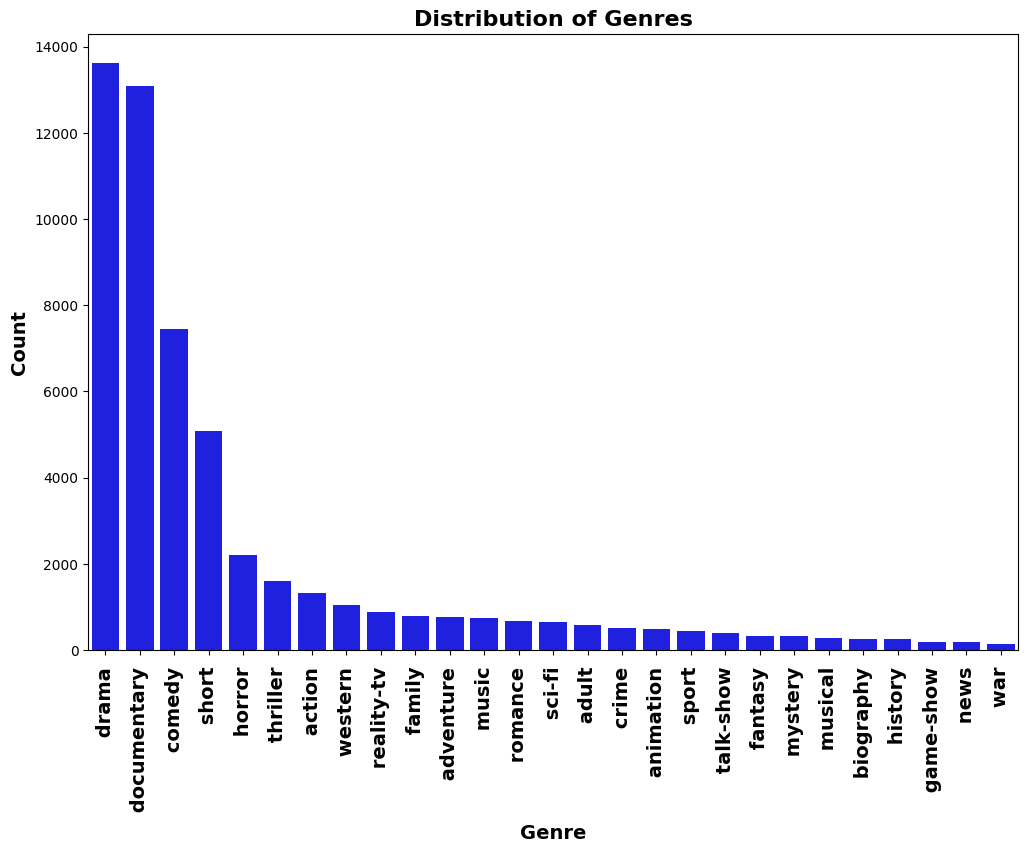

In [22]:
plt.figure(figsize=(12,8))
counts = train_data.Genre.value_counts()
sns.barplot(x=counts.index, y=counts, color='blue')
plt.xlabel('Genre' ,fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold');

In [23]:
train_data['length']=train_data['Description'].apply(len)
train_data.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


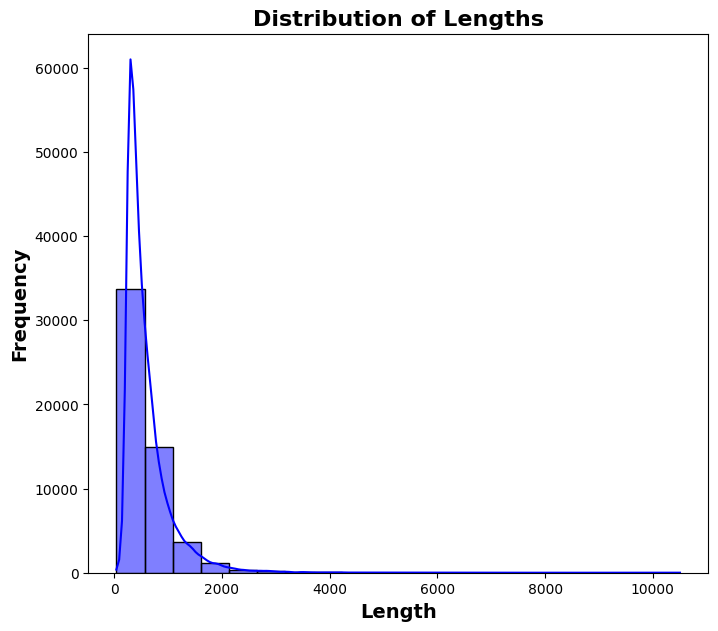

In [24]:
plt.figure(figsize=(8, 7))

sns.histplot(data=train_data, x='length', bins=20, kde=True, color='blue')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

# Data Pre-Processing

In [25]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)


    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [26]:
train_data["TextCleaning"] = train_data["Description"].apply(data_processing)

In [27]:
test_data["TextCleaning"] = test_data["Description"].apply(data_processing)

In [28]:
train_data

,Title,Genre,Description,length,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film title refers recovered bodies ground zero...
...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,507,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,781,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",255,bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,642,walter vivian live country difficult time keep...


# Using TF-IDF to vectorize the data

In [29]:
vector = TfidfVectorizer()

x_train = vector.fit_transform(train_data["TextCleaning"])
x_test = vector.transform(test_data["TextCleaning"])

Split the data into train data and test data

In [30]:
x = x_train
y = train_data["Genre"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [31]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (43371, 116601)
Size of y_train:  (43371,)
Size of x_test:  (10843, 116601)
Size of y_test:  (10843,)


# Train the models
 - Logistic Regession
 - Support vector Machine
 - Navie Bayes

In [32]:
model1 = LogisticRegression()
model2 = SVC()
model3 = MultinomialNB()
model4 = KNeighborsClassifier(n_neighbors=5)

In [33]:
columns=['LogisticRegression','MultinomialNB']
#  "KNN"]
result=[]

In [34]:
def cal(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred,y_test)
    result.append(accuracy)

    print("-----Model Evaluation on Test Data-----")
    print(model)
    print(accuracy)

In [35]:
# Logistic Regression
cal(model1)

-----Model Evaluation on Test Data-----
LogisticRegression()
0.5774232223554366


In [36]:
# Support Vector Machine
# cal(model2)

In [37]:
# Navie Bayes
cal(model3)

-----Model Evaluation on Test Data-----
MultinomialNB()
0.4460942543576501


In [38]:
# KNN
# cal(model4)

# Resulting

In [39]:
FinalResult=pd.DataFrame({'Algorithm':columns})
FinalResult['Accuracy'] = 57.74 , 44.60

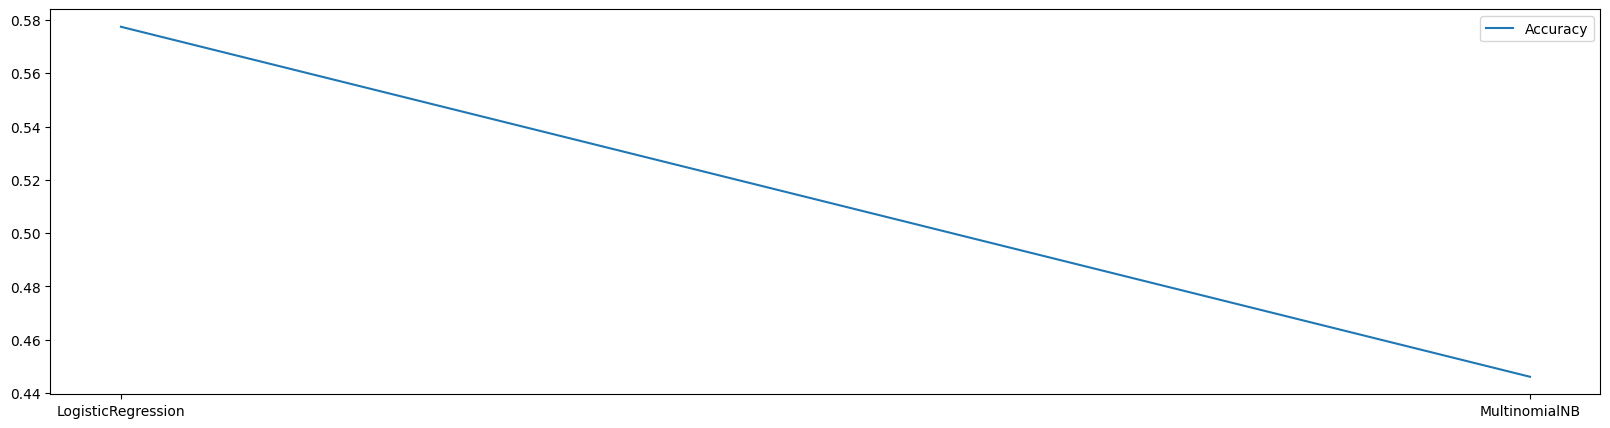

In [40]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,result,label="Accuracy")
plt.legend()
plt.show()

# Conclusion

Based on the analysis, the Logistic Regression model outperformed the Multinomial Naive Bayes model with an accuracy of 57.74% compared to 44.60%.

While these results provide a baseline, there's room for improvement. Future work could explore:

- **Hyperparameter Tuning:** Fine-tuning the models' parameters could enhance performance.
- **Advanced Feature Engineering:** Experimenting with different text preprocessing techniques and feature representations might yield better results.
- **Ensemble Methods:** Combining multiple models could potentially lead to a more robust and accurate prediction.
- **Deep Learning Approaches:** Investigating neural network architectures like RNNs or Transformers might capture more complex patterns in the text data.


Overall, this project demonstrates the potential of machine learning for genre classification in movies. Further exploration and refinement of the models could lead to even more accurate and insightful results.


# applying Deep Learing


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
# Sample data loading
train_data = pd.read_csv("/content/drive/MyDrive/CodSoft 2024/Movie  Generation Classification/Genre Classification Dataset/train_data.txt",
                         sep=":::", names=["Title", "Genre", "Description"], engine="python")
test_data = pd.read_csv("/content/drive/MyDrive/CodSoft 2024/Movie  Generation Classification/Genre Classification Dataset/test_data.txt",
                        sep=":::", names=["Id" ,"Title", "Description"], engine="python")

In [87]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()                                  # lower-case all characters
    text = re.sub('-',' ',text.lower())   # replace `word-word` as `word word`
    text = re.sub(f'[{string.digits}]',' ',text)  # remove digits
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])  # remove stopwords and stem other words
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text)
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return re.sub(f'[{re.escape(string.punctuation)}]','',text) # remove punctuations


# Test your cleaning function
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem


In [88]:
train_data['Text_cleaning'] = train_data.Description.apply(clean_text)
test_data['Text_cleaning'] = test_data.Description.apply(clean_text)

train_data.head()

,Title,Genre,Description,Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,list convers doct parents year old osc learn n...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,broth sist past incestu rel cur murd relations...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty stud field trip muse nat history lit...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy fath mak end meet edi twin sist ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films titl ref recov body ground zero also sta...


In [89]:
train_data['length_Text_cleaning']=train_data['Text_cleaning'].apply(len)
train_data.head()

,Title,Genre,Description,Text_cleaning,length_Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,list convers doct parents year old osc learn n...,324
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,broth sist past incestu rel cur murd relations...,83
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty stud field trip muse nat history lit...,325
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy fath mak end meet edi twin sist ...,616
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films titl ref recov body ground zero also sta...,282


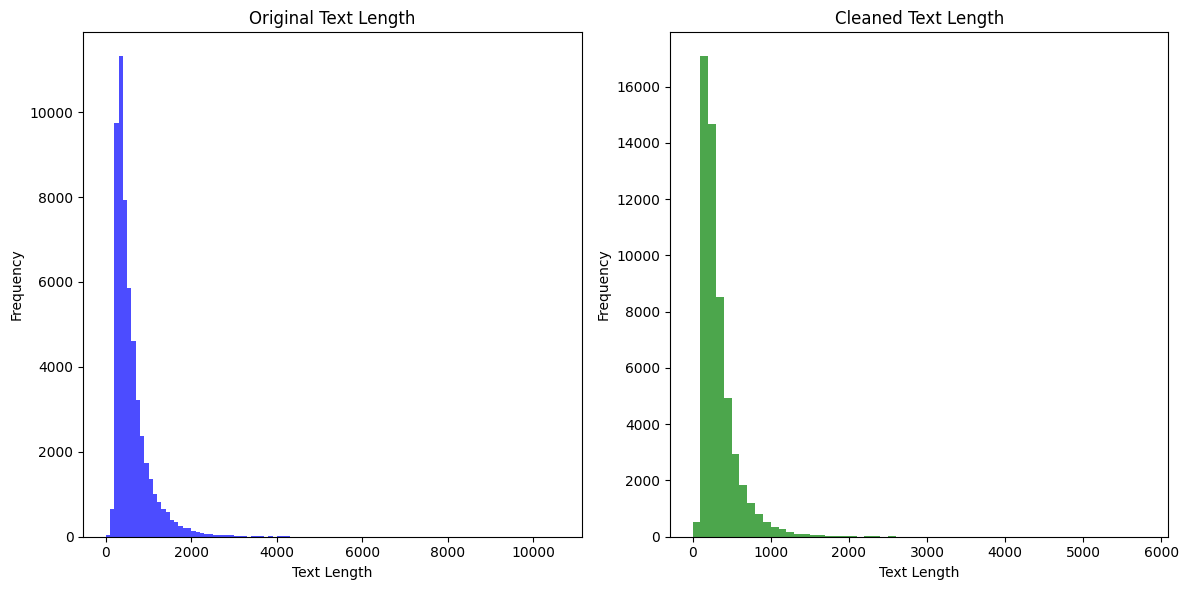

In [90]:
# Create histograms for text length before and after cleaning
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = train_data['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = train_data['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [91]:
(train_data['length_Text_cleaning']>2000).value_counts()

length_Text_cleaning
False    54131
True        83
Name: count, dtype: int64

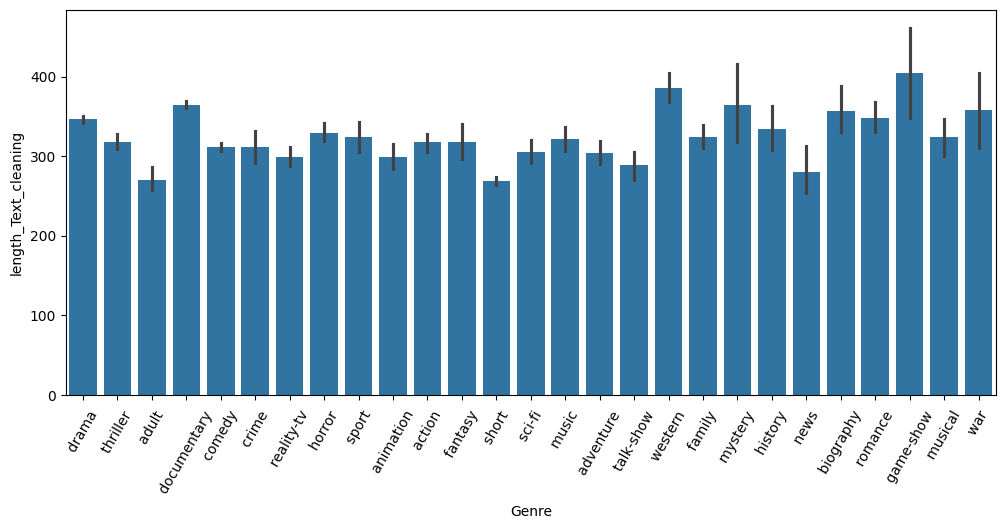

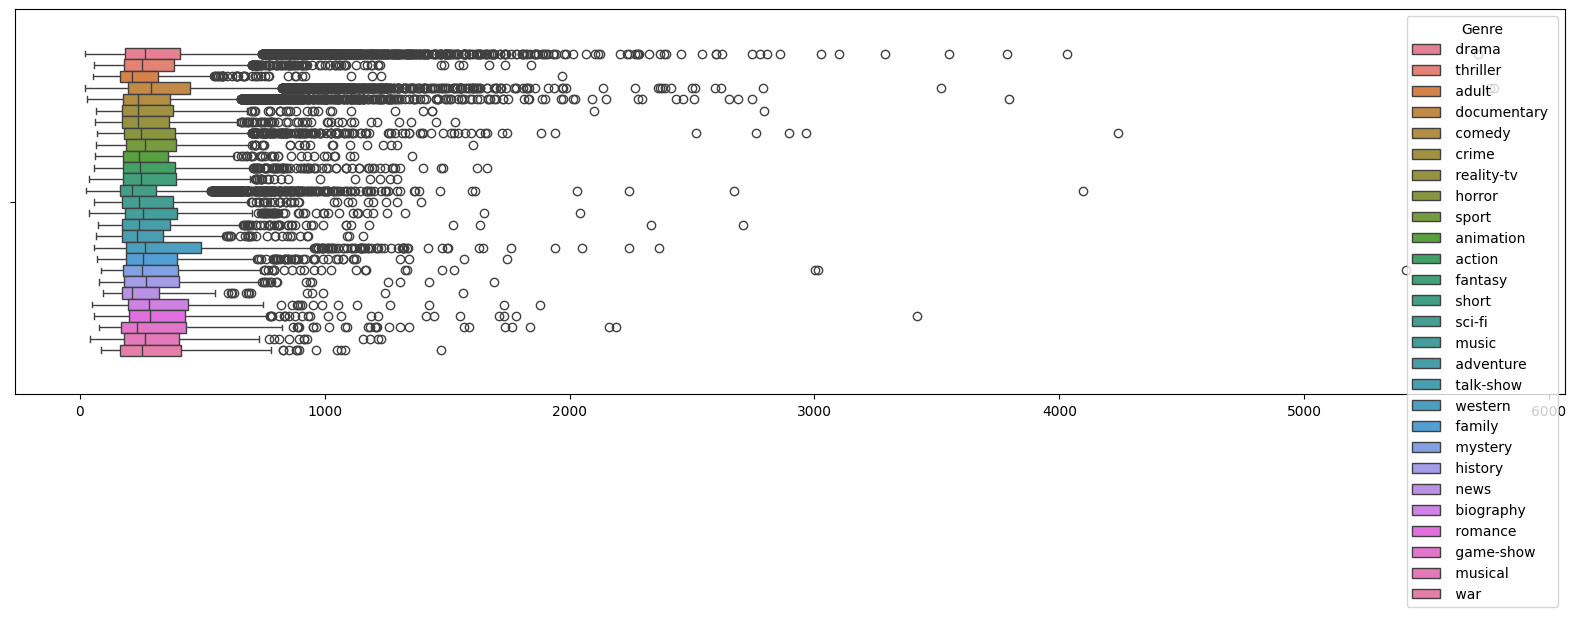

In [92]:
plt.figure(figsize=(12,5))
sns.barplot(x='Genre',y='length_Text_cleaning',data=train_data)  # from 600ish to 350ish -> significant reduction in length
plt.xticks(rotation=60)
plt.show()
plt.figure(figsize=(20,5))
sns.boxplot(x=train_data['length_Text_cleaning'].values,hue='Genre',data=train_data)
plt.show()

#Text tokenization and vectorization

In [93]:
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_data['Text_cleaning'].values)

In [94]:
test_path="/content/drive/MyDrive/CodSoft 2024/Movie  Generation Classification/Genre Classification Dataset/test_data_solution.txt"
test_data_solution=pd.read_csv( test_path , sep=':::',engine='python',names=['ID','Title','Genre','Description'])
test_data_solution.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


#Text Vectorization (TF-IDF)

In [95]:
X = tokenizer.texts_to_sequences(train_data['Text_cleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(train_data['Genre']).values

X_test = tokenizer.texts_to_sequences(test_data['Text_cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(test_data_solution['Genre']).values

In [98]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model

In [99]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              mode='auto')]
history = model.fit(X, y, epochs=6, batch_size=32,validation_data=(X_test,y_test), callbacks=my_callbacks)

Epoch 1/6
1695/1695 [==============================] - 1727s 1s/step - loss: 1.9424 - accuracy: 0.4369 - val_loss: 1.6839 - val_accuracy: 0.5118
Epoch 2/6
1695/1695 [==============================] - 1621s 957ms/step - loss: 1.4359 - accuracy: 0.5854 - val_loss: 1.5483 - val_accuracy: 0.5463
Epoch 3/6
1695/1695 [==============================] - 1630s 962ms/step - loss: 1.1166 - accuracy: 0.6779 - val_loss: 1.5780 - val_accuracy: 0.5454
Epoch 4/6
1695/1695 [==============================] - 1606s 947ms/step - loss: 0.8476 - accuracy: 0.7534 - val_loss: 1.6976 - val_accuracy: 0.5354


# Plotting Accuracy & Loss

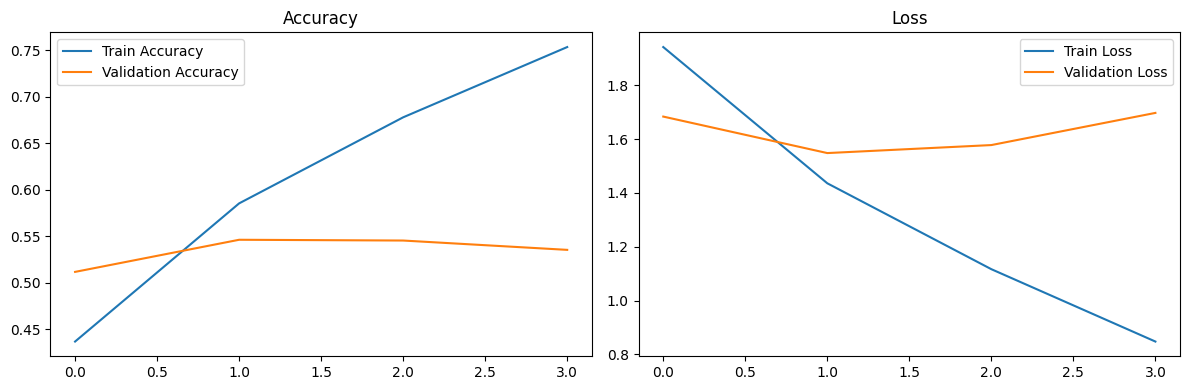

In [100]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()